## Homework 8

In the first problem I want you to think about loss functions for binary data. The second exercise prepares you for the "multinomial" case where we have more than 2 categories as outcome.

1. Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.
    * Predict the default probability on a regular array of balance values between on the interval $[0; 3000]$ and plot he resulting sigmoid-shaped curve.
    * Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$. 
    * Overlay these 4 points on the plot with a y value of $default=1$ (yes).
    * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$
2. Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$). 
    * Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortomings of this "one verus the rest" strategy.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm

In [12]:
df = pd.read_excel('../data/Default.xlsx')
df = df.sample(n=1000, random_state=1)
df["default"].value_counts()

No     967
Yes     33
Name: default, dtype: int64

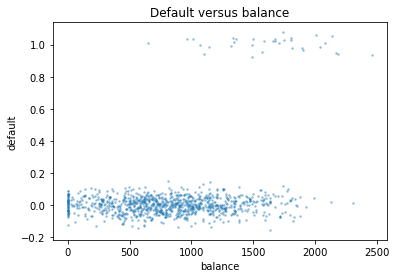

In [60]:
#add jitter to your plot:
N = df.shape[0]
df["default2"] = df["default"] == "Yes"
df["defaultJitter"] = df["default2"] + 0.05*np.random.randn(N)
plt.scatter(df["balance"], df["defaultJitter"],s = 2.5, alpha=0.35)
plt.xlabel('balance')
plt.ylabel('default')
plt.title('Default versus balance')
#plt.legend(['specificity', 'sensitivity'],fontsize=14)
plt.show();

### Multinomial LR

The iris data:

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
flowerType=["setosa", "versicolor", "virginica"]

np.unique(iris["target"])

array([0, 1, 2])